In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing

**Batch Gradient Descent** - is an optimization algorithm used in machine learning to minimize the cost or loss function by updating model parameters based on the gradients calculated over the entire training dataset. In this approach, the entire dataset is processed in each iteration, and the model parameters are updated accordingly. One major advantage of Batch Gradient Descent is that it often converges smoothly to the global minimum. However, this method can be computationally expensive for large datasets since it requires storing and processing the entire dataset in memory.

**Stochastic Gradient Descent** - is a different type of gradient descent algorithm wherein model parameters are updated with each individual training sample. This approach adds randomness into the process, providing faster updates but  leading to a more erratic (bouncing around) convergence pathway. This method requires lower memory and the parameter updates are often faster. However, the frequent updates involve noise and an unsmooth convergence path. It may also converge to a local minimum rather than the global minimum.

In [2]:
df = pd.read_excel('moviedataset.xlsx')

In [3]:
df.head()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0


In [4]:
df.isnull().sum()

Movie                   0
Year                    0
Ratings                 0
Genre                   0
Gross                   0
Budget                  1
Screens                10
Sequel                  0
Sentiment               0
Views                   0
Likes                   0
Dislikes                0
Comments                0
Aggregate Followers    35
dtype: int64

In [5]:
df[df['Budget'].isnull()]
df['Budget'] = df['Budget'].fillna(2000000) #replacing the null budget with an estimate from online resources

In [6]:
df = df.dropna()

In [7]:
y = df.Ratings
X = df[['Budget','Aggregate Followers']]
X = sm.add_constant(X)

In [8]:
lr_model = sm.OLS(y, X).fit() 
print(lr_model.summary())
print(lr_model.params)

                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     10.08
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           7.02e-05
Time:                        13:14:00   Log-Likelihood:                -255.84
No. Observations:                 188   AIC:                             517.7
Df Residuals:                     185   BIC:                             527.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.1258    

We can say that there is a positive correlation between Budget and Ratings of a movie basis our linear model above. As we increase the budget, the ratings also go higher. However, the coefficient for the exploratory variable 'aggregate followers' is not statistcally significant. Linear model:

y = (5.391e-09) * Budget + (4.665e-09) * Aggregatefollowers + 6.1258

In [9]:
X = df[['Budget','Aggregate Followers', 'Likes', 'Dislikes', 'Comments']]
X = sm.add_constant(X)

In [10]:
lr_model_2 = sm.OLS(y, X).fit() 
print(lr_model_2.summary())
print(lr_model_2.params)

                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     10.54
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           6.67e-09
Time:                        13:14:00   Log-Likelihood:                -241.65
No. Observations:                 188   AIC:                             495.3
Df Residuals:                     182   BIC:                             514.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.1924    

After we add the variables - likes, dislikes and comments, our model improves as R^2 more than doubles to 0.225. Further, we can see that there is a statistically significant relationship between the variables - likes & dislikes and Ratings. As we increase likes, rating increase. Along the expected lines, there is an inverse relationship between dislikes and Ratings. We will ignore the impact of Comments on Ratings because p = 0.138 and the coefficient is not statistically significant at a 90% confidence interval. Overall, our prediction capability increases as we add the new variables.

<AxesSubplot:>

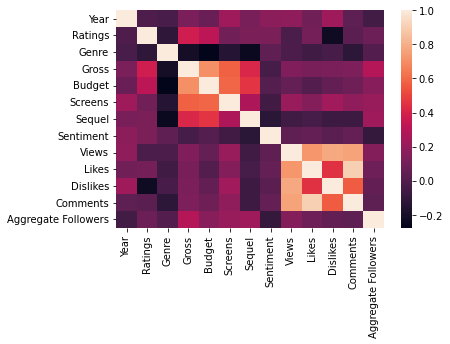

In [11]:
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr())

In [12]:
df.corr()

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
Year,1.000000,-0.016325,-0.030787,0.121178,0.071270,0.227988,0.116691,0.171634,0.182027,0.092042,0.225766,0.033806,-0.050032
Ratings,-0.016325,1.000000,-0.118662,0.373338,0.312582,0.095451,0.122592,0.122825,-0.026314,0.106806,-0.227066,0.027265,0.072794
Genre,-0.030787,-0.118662,1.000000,-0.204970,-0.276913,-0.150021,-0.237961,0.039116,-0.019127,-0.058734,-0.037412,-0.124560,0.002076
Gross,0.121178,0.373338,-0.204970,1.000000,0.705341,0.574542,0.413918,-0.040014,0.135156,0.116213,0.118923,0.127362,0.292983
Budget,0.071270,0.312582,-0.276913,0.705341,1.000000,0.586038,0.459378,0.004461,0.054678,-0.001471,0.048275,0.080258,0.160436
Screens,0.227988,0.095451,-0.150021,0.574542,0.586038,1.000000,0.267137,-0.055244,0.211233,0.147568,0.236121,0.183562,0.210822
Sequel,0.116691,0.122592,-0.237961,0.413918,0.459378,0.267137,1.000000,-0.135299,-0.060123,-0.041609,-0.072834,-0.077325,0.222674
Sentiment,0.171634,0.122825,0.039116,-0.040014,0.004461,-0.055244,-0.135299,1.000000,0.039017,0.055793,0.024501,0.052561,-0.099901
Views,0.182027,-0.026314,-0.019127,0.135156,0.054678,0.211233,-0.060123,0.039017,1.000000,0.723416,0.776819,0.764966,0.149220
Likes,0.092042,0.106806,-0.058734,0.116213,-0.001471,0.147568,-0.041609,0.055793,0.723416,1.000000,0.447800,0.903188,0.083554


'Budget' seems the best predictor of a movie rating, considering all aspects. 'Dislikes' comes a close second with a correlation of -0.225771. Here, we are more interested in the absolute value of the correlation index and since Budget's correlation index with Ratings is higher at 0.316338, we choose Budget as our suitable predictor for movie ratings. Also, in the models above - we see that as we increase the budget, the ratings go higher. The equation in linear form is mentioned above. Moreover, we did two independent linear regression analyses where we fixed y as Ratings and first took x as Budget and later replaced Budget with Dislikes. We noticed a higher R^2 with Budget and hence choose it as our best predictor of movie ratings.

Used two methods to find the gradient descent algorithm - First, using SGD Regressor and then attempted manually.

In [13]:
y = np.array(df.Ratings)
X = np.array(df.Budget).reshape(-1,1)

In [14]:
sgd_regressor = SGDRegressor(max_iter=2000, alpha=0.001, learning_rate='invscaling', random_state=42)
sgd_regressor.fit(X, y)

print("Intercept:", sgd_regressor.intercept_)
print("Coefficient:", sgd_regressor.coef_)

Intercept: [1.50400942e+10]
Coefficient: [1.23486842e+17]


In [15]:
df = pd.read_csv('movies.csv') #uploaded the file again - wanted to have maximum entries

X = df[['Budget']]
y = df[['Ratings']]

In [16]:
def grad_descent(X, y, alpha, epsilon):
    iteration = [0]
    i = 0
    m = np.shape(X)[0]  # Total number of samples

    # Initialize the parameters
    Theta = np.ones(shape=(len(df.columns), 1))

    # Compute the initial cost
    # For matrix multiplications, Python uses '@' as the operator.
    cost = [np.transpose(X @ Theta - y) @ (X @ Theta - y)]
    delta = 1

    while (delta>epsilon):
        gradient = ((np.transpose(X)) @ (X @ Theta - y))
        Theta = Theta - alpha*gradient
        J_Theta = 1/m * (np.transpose(X @ Theta - y)) @ (X @ Theta - y)
        print(J_Theta[0])
        cost.append(J_Theta)
        delta = abs(cost[i+1]-cost[i])
        if ((cost[i+1]-cost[i]) > 0):
            print("The cost is increasing. Try reducing alpha.")
            break
        iteration.append(i)
        i += 1

    print("Completed in %d iterations." %(i))
    return(Theta)

In [17]:
X = pd.concat((pd.DataFrame([1,len(df)]*115), df[['Budget']]),axis=1, join='outer').to_numpy()
y = y.to_numpy()

Theta = grad_descent(X = preprocessing.scale(X), y=y, alpha=0.001, epsilon = 10**-10)
print (Theta)

[43.25763791]
[42.90037025]
[42.68491214]
[42.55497043]
[42.47660032]
[42.42933227]
[42.40082208]
[42.38362531]
[42.37325223]
[42.366995]
[42.36322041]
[42.36094338]
[42.35956971]
[42.35874099]
[42.35824103]
[42.35793939]
[42.3577574]
[42.3576476]
[42.35758135]
[42.35754137]
[42.35751726]
[42.3575027]
[42.35749392]
[42.35748862]
[42.35748542]
[42.35748349]
[42.35748233]
[42.35748163]
[42.3574812]
[42.35748095]
[42.35748079]
[42.3574807]
[42.35748064]
[42.35748061]
[42.35748059]
[42.35748058]
[42.35748057]
[42.35748056]
[42.35748056]
[42.35748056]
[42.35748056]
[42.35748056]
[42.35748056]
[42.35748056]
[42.35748056]
[42.35748056]
Completed in 46 iterations.
[[-0.01220012]
 [ 0.28435667]]
